### Deliverable 1: Preprocessing the Data for a Neural Network

In [41]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,Jan-99,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [42]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,Jan-99,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [43]:
# Determine the number of unique values in each column.
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [44]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df.APPLICATION_TYPE.value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

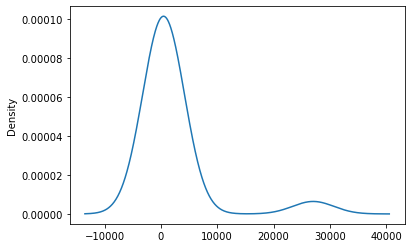

In [45]:
# Visualize the value counts of APPLICATION_TYPE
app_type_count.plot.density()

In [46]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_type_count[app_type_count < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [47]:
# Look at CLASSIFICATION value counts for binning
class_type_count = application_df.CLASSIFICATION.value_counts()
class_type_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

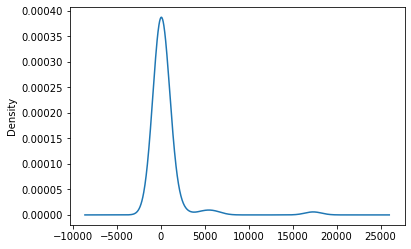

In [48]:
# Visualize the value counts of CLASSIFICATION
class_type_count.plot.density()

In [49]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_type_count[class_type_count < 1880].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [50]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [51]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\jsjer\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,INCOME_AMT_Jan-99,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [52]:
# Merge one-hot encoded features and drop the originals
train_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(application_cat, 1)


C:\Users\jsjer\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [53]:
# Split our preprocessed data into our features and target arrays
y = train_df["IS_SUCCESSFUL"].values
X = train_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

C:\Users\jsjer\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
X_train

array([[1.000000e+00, 5.000000e+03, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [1.000000e+00, 3.531390e+05, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [1.000000e+00, 5.402400e+04, 0.000000e+00, ..., 1.000000e+00,
        1.000000e+00, 0.000000e+00],
       ...,
       [1.000000e+00, 5.000000e+03, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [1.000000e+00, 4.564513e+06, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [1.000000e+00, 5.000000e+03, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00]])

In [55]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [56]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 =30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3520      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [58]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [59]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [60]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 9:31 - loss: 291.1975 - accuracy: 0.6250
Epoch 00001: saving model to checkpoints\weights.01.hdf5
  5/804 [..............................] - ETA: 11s - loss: 1707.5990 - accuracy: 0.5312
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 15/804 [..............................] - ETA: 6s - loss: 2266.9692 - accuracy: 0.5021 
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 25/804 [..............................] - ETA: 5s - loss: 2126.2263 - accuracy: 0.5138
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 35/804 [>.............................] - ETA: 5s - loss: 1604.6356 - accuracy: 0.5027
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 45/804 [>..................

450/804 [===============>..............] - ETA: 1s - loss: 56824.2969 - accuracy: 0.4792
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
465/804 [================>.............] - ETA: 1s - loss: 55026.5781 - accuracy: 0.4804
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
480/804 [================>.............] - ETA: 1s - loss: 53395.6094 - accuracy: 0.4806
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
495/804 [=================>............] - ETA: 1s - loss: 51978.6797 - accuracy: 0.4800
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 000

106/804 [==>...........................] - ETA: 2s - loss: 7734.2764 - accuracy: 0.4688
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 12326.8438 - accuracy: 0.4703
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 16971.0527 - accuracy: 0.4729
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 15488.4316 - accuracy: 0.4731
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 0000


Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 15652.5010 - accuracy: 0.4984
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 15308.3760 - accuracy: 0.4971
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 15177.9248 - accuracy: 0.4964
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 14906.2412 - accuracy: 0.4972
Epoch 000

227/804 [=======>......................] - ETA: 2s - loss: 52796.7266 - accuracy: 0.4754
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 55367.8750 - accuracy: 0.4725
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 57671.6016 - accuracy: 0.4745
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
272/804 [=========>....................] - ETA: 2s - loss: 55918.0898 - accuracy: 0.4727
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 000

692/804 [========================>.....] - ETA: 0s - loss: 34897.5508 - accuracy: 0.4867
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 34410.8867 - accuracy: 0.4855
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 35539.3711 - accuracy: 0.4852
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 37186.2773 - accuracy: 0.4846
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 000


Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
353/804 [============>.................] - ETA: 1s - loss: 83352.5234 - accuracy: 0.4791
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
368/804 [============>.................] - ETA: 1s - loss: 80233.8984 - accuracy: 0.4793
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
383/804 [=============>................] - ETA: 1s - loss: 78414.1797 - accuracy: 0.4788
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
398/804 [=============>................] - ETA: 1s - loss: 75473.6562 - accuracy: 0.4806
Epoch 000


Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 14/804 [..............................] - ETA: 3s - loss: 5039.4775 - accuracy: 0.5781
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 3465.5830 - accuracy: 0.5517
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 2518.9854 - accuracy: 0.5554
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 59/804 [=>............................] - ETA: 3s - loss: 2009.4480 - accuracy: 0.5524
Epoch 00005: 

475/804 [================>.............] - ETA: 1s - loss: 9065.2969 - accuracy: 0.4984
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
489/804 [=================>............] - ETA: 1s - loss: 8854.4717 - accuracy: 0.4975
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
504/804 [=================>............] - ETA: 1s - loss: 9482.4395 - accuracy: 0.4979
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 9595.6592 - accuracy: 0.4980
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: 


Epoch 00006: saving model to checkpoints\weights.06.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 30541.4824 - accuracy: 0.4998
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 41437.8789 - accuracy: 0.4931
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
162/804 [=====>........................] - ETA: 2s - loss: 40076.1992 - accuracy: 0.4927
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
175/804 [=====>........................] - ETA: 2s - loss: 39181.8711 - accuracy: 0.4929
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 000

605/804 [=====================>........] - ETA: 0s - loss: 40477.5273 - accuracy: 0.4992
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 42150.1211 - accuracy: 0.4988
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 41246.6914 - accuracy: 0.4999
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 40466.4375 - accuracy: 0.5009
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 000

266/804 [========>.....................] - ETA: 2s - loss: 32250.3574 - accuracy: 0.4814
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
281/804 [=========>....................] - ETA: 2s - loss: 30896.8613 - accuracy: 0.4839
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
296/804 [==========>...................] - ETA: 2s - loss: 29707.7773 - accuracy: 0.4832
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
311/804 [==========>...................] - ETA: 2s - loss: 28309.3789 - accuracy: 0.4843
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 000

731/804 [==========================>...] - ETA: 0s - loss: 22098.1895 - accuracy: 0.4797
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 23751.3906 - accuracy: 0.4793
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 23444.6992 - accuracy: 0.4792
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 23165.3613 - accuracy: 0.4795
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 000


Epoch 00008: saving model to checkpoints\weights.08.hdf5
395/804 [=============>................] - ETA: 1s - loss: 16203.3623 - accuracy: 0.4747
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 16115.9824 - accuracy: 0.4751
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 15810.7275 - accuracy: 0.4756
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 16775.1465 - accuracy: 0.4742
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 000

 43/804 [>.............................] - ETA: 3s - loss: 662.2325 - accuracy: 0.4876
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
 58/804 [=>............................] - ETA: 3s - loss: 659.2798 - accuracy: 0.4941
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
 73/804 [=>............................] - ETA: 3s - loss: 4716.3813 - accuracy: 0.4884
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
 88/804 [==>...........................] - ETA: 2s - loss: 4233.2314 - accuracy: 0.4954
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: sa


Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 3825.3691 - accuracy: 0.5112
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 3894.4397 - accuracy: 0.5119
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 4624.0322 - accuracy: 0.5125
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 4550.2612 - accuracy: 0.5133
Epoch 00009: 


Epoch 00010: saving model to checkpoints\weights.10.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 6456.7046 - accuracy: 0.4639
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 6053.6689 - accuracy: 0.4621
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 6373.7930 - accuracy: 0.4619
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 6128.0259 - accuracy: 0.4600
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: 

639/804 [======================>.......] - ETA: 0s - loss: 9388.3760 - accuracy: 0.4888
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 9190.9062 - accuracy: 0.4900
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 9010.1738 - accuracy: 0.4907
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 8816.9727 - accuracy: 0.4918
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: 


Epoch 00011: saving model to checkpoints\weights.11.hdf5
300/804 [==========>...................] - ETA: 2s - loss: 976.1518 - accuracy: 0.5275 
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
315/804 [==========>...................] - ETA: 2s - loss: 974.6264 - accuracy: 0.5260
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
330/804 [===========>..................] - ETA: 1s - loss: 982.8986 - accuracy: 0.5251
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 1212.4727 - accuracy: 0.5260
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: sa


Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 8832.7012 - accuracy: 0.5222
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
790/804 [============================>.] - ETA: 0s - loss: 8671.1982 - accuracy: 0.5223
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 8537.2822 - accuracy: 0.5220
Epoch 12/100

Epoch 00012: saving model to checkpoints\weights.12.hdf5
  1/804 [..............................] - ETA: 6s - loss: 78.4864 - accuracy: 0.4688
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf


Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 14346.9473 - accuracy: 0.4873
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 14058.1719 - accuracy: 0.4882
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
466/804 [================>.............] - ETA: 1s - loss: 14201.7920 - accuracy: 0.4891
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
481/804 [================>.............] - ETA: 1s - loss: 13971.4941 - accuracy: 0.4898
Epoch 000

 87/804 [==>...........................] - ETA: 2s - loss: 1031.5020 - accuracy: 0.5348
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 887.5414 - accuracy: 0.5377 
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 783.1673 - accuracy: 0.5323
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
132/804 [===>..........................] - ETA: 2s - loss: 701.7534 - accuracy: 0.5327
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: sa


Epoch 00013: saving model to checkpoints\weights.13.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 4071.4827 - accuracy: 0.5203
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 4118.5420 - accuracy: 0.5207
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 4169.1548 - accuracy: 0.5206
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 4590.4409 - accuracy: 0.5215
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: 


Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 9739.9346 - accuracy: 0.5069
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 10929.3330 - accuracy: 0.5033
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 27892.9492 - accuracy: 0.4996
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 26921.6270 - accuracy: 0.4954
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 0001

678/804 [========================>.....] - ETA: 0s - loss: 14847.0723 - accuracy: 0.4951
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 15023.7588 - accuracy: 0.4940
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 14746.6182 - accuracy: 0.4921
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 14556.9043 - accuracy: 0.4911
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 000


Epoch 00015: saving model to checkpoints\weights.15.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 3637.8347 - accuracy: 0.5059
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
354/804 [============>.................] - ETA: 1s - loss: 3512.7722 - accuracy: 0.5041
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
369/804 [============>.................] - ETA: 1s - loss: 4286.1245 - accuracy: 0.5026
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
384/804 [=============>................] - ETA: 1s - loss: 4319.4819 - accuracy: 0.5001
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: 

804/804 [==============================] - 3s 4ms/step - loss: 5317.9648 - accuracy: 0.4957
Epoch 16/100
  1/804 [..............................] - ETA: 0s - loss: 14922.8496 - accuracy: 0.2812
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
 15/804 [..............................] - ETA: 3s - loss: 14997.7373 - accuracy: 0.4979
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
 30/804 [>.............................] - ETA: 3s - loss: 10085.0996 - accuracy: 0.4875
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
 45/804 [>.............................] - ETA: 3s - loss: 7741.1099 - accuracy: 0.4854 
Epoch 00016: saving 

465/804 [================>.............] - ETA: 1s - loss: 5251.3022 - accuracy: 0.5180
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
480/804 [================>.............] - ETA: 1s - loss: 5132.8228 - accuracy: 0.5196
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
495/804 [=================>............] - ETA: 1s - loss: 5106.7676 - accuracy: 0.5211
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 5318.9795 - accuracy: 0.5202
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: 

121/804 [===>..........................] - ETA: 2s - loss: 3469.7224 - accuracy: 0.4801
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 3139.3328 - accuracy: 0.4844
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 2973.7488 - accuracy: 0.4967
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 3090.2559 - accuracy: 0.4991
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: 


Epoch 00017: saving model to checkpoints\weights.17.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 2789.9019 - accuracy: 0.4939
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 3169.7869 - accuracy: 0.4939
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 4107.1816 - accuracy: 0.4936
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 4133.4092 - accuracy: 0.4943
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: 

252/804 [========>.....................] - ETA: 2s - loss: 1344.9235 - accuracy: 0.5308
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 1282.7917 - accuracy: 0.5321
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
282/804 [=========>....................] - ETA: 2s - loss: 1232.0822 - accuracy: 0.5320
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
297/804 [==========>...................] - ETA: 2s - loss: 1263.2507 - accuracy: 0.5311
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: 

722/804 [=========================>....] - ETA: 0s - loss: 1812.2393 - accuracy: 0.5385
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 1785.5898 - accuracy: 0.5386
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 1855.6683 - accuracy: 0.5375
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 1876.9038 - accuracy: 0.5369
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: 


Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
383/804 [=============>................] - ETA: 1s - loss: 1356.0444 - accuracy: 0.5089
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
398/804 [=============>................] - ETA: 1s - loss: 1309.1843 - accuracy: 0.5111
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 1295.2355 - accuracy: 0.5123
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
428/804 [==============>...............] - ETA: 1s - loss: 1257.9534 - accuracy: 0.5129
Epoch 00019: 


Epoch 00020: saving model to checkpoints\weights.20.hdf5
 39/804 [>.............................] - ETA: 3s - loss: 675.4756 - accuracy: 0.5304
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
 53/804 [>.............................] - ETA: 3s - loss: 511.3668 - accuracy: 0.5413
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
 64/804 [=>............................] - ETA: 3s - loss: 424.3772 - accuracy: 0.5425
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
 79/804 [=>............................] - ETA: 3s - loss: 345.7570 - accuracy: 0.5455
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: savi

503/804 [=================>............] - ETA: 1s - loss: 287.9419 - accuracy: 0.5324
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 282.1718 - accuracy: 0.5326
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 276.2726 - accuracy: 0.5334
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 272.9405 - accuracy: 0.5326
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: savi

155/804 [====>.........................] - ETA: 2s - loss: 4.8921 - accuracy: 0.6232
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
170/804 [=====>........................] - ETA: 2s - loss: 4.5395 - accuracy: 0.6226
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
185/804 [=====>........................] - ETA: 2s - loss: 4.2451 - accuracy: 0.6215
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
200/804 [======>.......................] - ETA: 2s - loss: 3.9942 - accuracy: 0.6233
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model

635/804 [======================>.......] - ETA: 0s - loss: 2.3184 - accuracy: 0.6438
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 2.2894 - accuracy: 0.6450
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 2.2724 - accuracy: 0.6453
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 2.2469 - accuracy: 0.6469
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 2.2281 - accuracy: 0.6479


Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
301/804 [==========>...................] - ETA: 2s - loss: 1.5681 - accuracy: 0.6853
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
316/804 [==========>...................] - ETA: 2s - loss: 1.5912 - accuracy: 0.6864
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
331/804 [===========>..................] - ETA: 2s - loss: 1.5717 - accuracy: 0.6844
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
346/804 [===========>..................] - ETA: 1s - loss: 1.5384 - accuracy: 0.6852
Epoch 00022: saving model


Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 2.2473 - accuracy: 0.6760
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
791/804 [============================>.] - ETA: 0s - loss: 2.2171 - accuracy: 0.6762
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 2.1919 - accuracy: 0.6765
Epoch 23/100
  1/804 [..............................] - ETA: 0s - loss: 0.7163 - accuracy: 0.5938
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.6776 


Epoch 00023: saving model to checkpoints\weights.23.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 0.6279 - accuracy: 0.6870
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 0.6264 - accuracy: 0.6881
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.6262 - accuracy: 0.6880
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.6250 - accuracy: 0.6887
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model

 98/804 [==>...........................] - ETA: 3s - loss: 0.6012 - accuracy: 0.6913
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
112/804 [===>..........................] - ETA: 2s - loss: 0.5998 - accuracy: 0.6931
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
123/804 [===>..........................] - ETA: 2s - loss: 0.5972 - accuracy: 0.6966
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
138/804 [====>.........................] - ETA: 2s - loss: 0.5933 - accuracy: 0.7009
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
153/804 [====>............

568/804 [====================>.........] - ETA: 0s - loss: 0.5950 - accuracy: 0.6948
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
583/804 [====================>.........] - ETA: 0s - loss: 0.5949 - accuracy: 0.6945
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.5943 - accuracy: 0.6952
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.5944 - accuracy: 0.6954
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model

229/804 [=======>......................] - ETA: 2s - loss: 0.5808 - accuracy: 0.7046
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
244/804 [========>.....................] - ETA: 2s - loss: 0.5823 - accuracy: 0.7030
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
259/804 [========>.....................] - ETA: 2s - loss: 0.5835 - accuracy: 0.7021
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
274/804 [=========>....................] - ETA: 2s - loss: 0.5833 - accuracy: 0.7026
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model

699/804 [=========================>....] - ETA: 0s - loss: 0.5855 - accuracy: 0.6985
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.5858 - accuracy: 0.6983
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.5866 - accuracy: 0.6977
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.5867 - accuracy: 0.6971
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
754/804 [=================

355/804 [============>.................] - ETA: 1s - loss: 0.5867 - accuracy: 0.6946
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.5867 - accuracy: 0.6944
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
385/804 [=============>................] - ETA: 1s - loss: 0.5868 - accuracy: 0.6939
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
400/804 [=============>................] - ETA: 1s - loss: 0.5880 - accuracy: 0.6930
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model


Epoch 00027: saving model to checkpoints\weights.27.hdf5
 31/804 [>.............................] - ETA: 3s - loss: 0.5986 - accuracy: 0.6875
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
 46/804 [>.............................] - ETA: 3s - loss: 0.5964 - accuracy: 0.6821
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
 61/804 [=>............................] - ETA: 3s - loss: 0.5973 - accuracy: 0.6808
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
 76/804 [=>............................] - ETA: 3s - loss: 0.5883 - accuracy: 0.6883
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model

506/804 [=================>............] - ETA: 1s - loss: 0.5840 - accuracy: 0.6963
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 0.5839 - accuracy: 0.6965
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.5838 - accuracy: 0.6969
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 0.5834 - accuracy: 0.6970
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model

177/804 [=====>........................] - ETA: 2s - loss: 0.5867 - accuracy: 0.6977
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.5897 - accuracy: 0.6956
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 0.5866 - accuracy: 0.6969
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 0.5867 - accuracy: 0.6974
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model

652/804 [=======================>......] - ETA: 0s - loss: 0.5849 - accuracy: 0.6963
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5847 - accuracy: 0.6962
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.5850 - accuracy: 0.6960
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.5850 - accuracy: 0.6961
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model


Epoch 00029: saving model to checkpoints\weights.29.hdf5
323/804 [===========>..................] - ETA: 1s - loss: 0.5858 - accuracy: 0.6994
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.5857 - accuracy: 0.6991
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
353/804 [============>.................] - ETA: 1s - loss: 0.5847 - accuracy: 0.6995
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.5862 - accuracy: 0.6977
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model

798/804 [============================>.] - ETA: 0s - loss: 0.5839 - accuracy: 0.6979
Epoch 00029: saving model to checkpoints\weights.29.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5839 - accuracy: 0.6979
Epoch 30/100
  1/804 [..............................] - ETA: 1s - loss: 0.7105 - accuracy: 0.5000
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.6076 - accuracy: 0.6696
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 0.5890 - accuracy: 0.6929
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoint


Epoch 00030: saving model to checkpoints\weights.30.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.5830 - accuracy: 0.6970
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.5835 - accuracy: 0.6964
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.5830 - accuracy: 0.6967
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.5829 - accuracy: 0.6974
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model

100/804 [==>...........................] - ETA: 2s - loss: 0.5723 - accuracy: 0.7075
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
115/804 [===>..........................] - ETA: 2s - loss: 0.5714 - accuracy: 0.7092
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
130/804 [===>..........................] - ETA: 2s - loss: 0.5729 - accuracy: 0.7084
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
145/804 [====>.........................] - ETA: 2s - loss: 0.5723 - accuracy: 0.7099
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model

540/804 [===================>..........] - ETA: 1s - loss: 0.5810 - accuracy: 0.7017
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.5819 - accuracy: 0.7007
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 0.5816 - accuracy: 0.7008
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.5821 - accuracy: 0.7008
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
585/804 [====================>.........] - ETA: 1s - loss: 0.5808 - accuracy: 0.7018
Epoch 00031: saving model to checkpoints\weights.31.hdf5


156/804 [====>.........................] - ETA: 2s - loss: 0.5883 - accuracy: 0.6959
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
171/804 [=====>........................] - ETA: 2s - loss: 0.5874 - accuracy: 0.6961
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
185/804 [=====>........................] - ETA: 2s - loss: 0.5861 - accuracy: 0.6973
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.5894 - accuracy: 0.6945
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
211/804 [======>..........


Epoch 00032: saving model to checkpoints\weights.32.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5839 - accuracy: 0.6965
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.5829 - accuracy: 0.6976
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.5837 - accuracy: 0.6971
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.5836 - accuracy: 0.6967
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model

277/804 [=========>....................] - ETA: 2s - loss: 0.5847 - accuracy: 0.6940
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 0.5844 - accuracy: 0.6949
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
307/804 [==========>...................] - ETA: 2s - loss: 0.5837 - accuracy: 0.6959
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
319/804 [==========>...................] - ETA: 2s - loss: 0.5840 - accuracy: 0.6958
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
332/804 [===========>.....

747/804 [==========================>...] - ETA: 0s - loss: 0.5877 - accuracy: 0.6931
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.5876 - accuracy: 0.6930
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.5875 - accuracy: 0.6932
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5876 - accuracy: 0.6932
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
801/804 [============================>.] - ETA: 0s - loss: 0.5875 - accuracy: 0.6931

401/804 [=============>................] - ETA: 1s - loss: 0.5963 - accuracy: 0.6841
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.5963 - accuracy: 0.6845
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
428/804 [==============>...............] - ETA: 1s - loss: 0.5971 - accuracy: 0.6838
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
443/804 [===============>..............] - ETA: 1s - loss: 0.5960 - accuracy: 0.6844
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model

 54/804 [=>............................] - ETA: 3s - loss: 0.5819 - accuracy: 0.6950
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
 69/804 [=>............................] - ETA: 3s - loss: 0.5813 - accuracy: 0.6970
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
 84/804 [==>...........................] - ETA: 3s - loss: 0.5818 - accuracy: 0.6949
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
 99/804 [==>...........................] - ETA: 3s - loss: 0.5890 - accuracy: 0.6913
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model

524/804 [==================>...........] - ETA: 1s - loss: 0.5940 - accuracy: 0.6888
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.5938 - accuracy: 0.6892
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.5932 - accuracy: 0.6898
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.5931 - accuracy: 0.6896
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
579/804 [=================


Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
190/804 [======>.......................] - ETA: 2s - loss: 0.5939 - accuracy: 0.6911
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
203/804 [======>.......................] - ETA: 2s - loss: 0.5951 - accuracy: 0.6893
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
215/804 [=======>......................] - ETA: 2s - loss: 0.5947 - accuracy: 0.6898
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
230/804 [=======>......................] - ETA: 2s - loss: 0.5951 - accuracy: 0.6910
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model


Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.5966 - accuracy: 0.6888
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5968 - accuracy: 0.6882
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.5968 - accuracy: 0.6884
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.5966 - accuracy: 0.6884
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model

316/804 [==========>...................] - ETA: 2s - loss: 0.6005 - accuracy: 0.6846
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 0.6028 - accuracy: 0.6834
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
346/804 [===========>..................] - ETA: 1s - loss: 0.6061 - accuracy: 0.6818
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.6077 - accuracy: 0.6803
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model

796/804 [============================>.] - ETA: 0s - loss: 0.6093 - accuracy: 0.6740
Epoch 00037: saving model to checkpoints\weights.37.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6088 - accuracy: 0.6740
Epoch 38/100
  1/804 [..............................] - ETA: 0s - loss: 0.5916 - accuracy: 0.7188
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.6253 - accuracy: 0.6667
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.6094 - accuracy: 0.6806
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
 41/804 [>.............................]

457/804 [================>.............] - ETA: 1s - loss: 0.6001 - accuracy: 0.6792
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.5990 - accuracy: 0.6805
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.5991 - accuracy: 0.6810
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.5985 - accuracy: 0.6816
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model


Epoch 00039: saving model to checkpoints\weights.39.hdf5
118/804 [===>..........................] - ETA: 2s - loss: 0.6014 - accuracy: 0.6790
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
133/804 [===>..........................] - ETA: 2s - loss: 0.6038 - accuracy: 0.6783
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 0.6065 - accuracy: 0.6742
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
160/804 [====>.........................] - ETA: 2s - loss: 0.6079 - accuracy: 0.6717
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model

588/804 [====================>.........] - ETA: 0s - loss: 0.6109 - accuracy: 0.6737
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.6113 - accuracy: 0.6743
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.6117 - accuracy: 0.6735
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.6108 - accuracy: 0.6743
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model

249/804 [========>.....................] - ETA: 2s - loss: 0.6200 - accuracy: 0.6658
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
264/804 [========>.....................] - ETA: 2s - loss: 0.6197 - accuracy: 0.6660
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
279/804 [=========>....................] - ETA: 2s - loss: 0.6192 - accuracy: 0.6659
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
294/804 [=========>....................] - ETA: 2s - loss: 0.6173 - accuracy: 0.6685
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model


Epoch 00040: saving model to checkpoints\weights.40.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 19.4390 - accuracy: 0.6277
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 19.1600 - accuracy: 0.6263
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 18.7925 - accuracy: 0.6250
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 18.4625 - accuracy: 0.6233
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving m


Epoch 00041: saving model to checkpoints\weights.41.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5354
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
395/804 [=============>................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5350
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
410/804 [==============>...............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5346
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model


Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
 41/804 [>.............................] - ETA: 3s - loss: 0.6894 - accuracy: 0.5442
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
 56/804 [=>............................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5396
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
 71/804 [=>............................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5317
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
 86/804 [==>...........................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5349
Epoch 00042: saving model

501/804 [=================>............] - ETA: 1s - loss: 0.6903 - accuracy: 0.5381
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 0.6904 - accuracy: 0.5378
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.6904 - accuracy: 0.5375
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
545/804 [===================>..........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5372
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
556/804 [=================

157/804 [====>.........................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5352
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
170/804 [=====>........................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5336
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
182/804 [=====>........................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5345
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
197/804 [======>.......................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5354
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
212/804 [======>..........


Epoch 00043: saving model to checkpoints\weights.43.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5353
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5354
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5351
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5348
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model


Epoch 00044: saving model to checkpoints\weights.44.hdf5
288/804 [=========>....................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5324
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
303/804 [==========>...................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5319
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
318/804 [==========>...................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5315
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
333/804 [===========>..................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5319
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model


Epoch 00044: saving model to checkpoints\weights.44.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6906 - accuracy: 0.5369
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6905 - accuracy: 0.5373
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6906 - accuracy: 0.5365
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6907 - accuracy: 0.5362
Epoch 45/100
  1/804 [..............................] - ETA: 1s - loss: 0.6713 - accuracy: 0.6875
Epoch 00045: saving model to checkpoint

419/804 [==============>...............] - ETA: 1s - loss: 0.6906 - accuracy: 0.5367
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5360
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5351
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5355
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model

 75/804 [=>............................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5354
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
 88/804 [==>...........................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5295
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
100/804 [==>...........................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5322
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
115/804 [===>..........................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5307
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
130/804 [===>.............

550/804 [===================>..........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5364
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
565/804 [====================>.........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5367
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.6906 - accuracy: 0.5367
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 0.6906 - accuracy: 0.5368
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model

221/804 [=======>......................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5385
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
236/804 [=======>......................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5380
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
251/804 [========>.....................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5383
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
266/804 [========>.....................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5392
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model

691/804 [========================>.....] - ETA: 0s - loss: 0.6906 - accuracy: 0.5372
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5367
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6906 - accuracy: 0.5370
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6907 - accuracy: 0.5362
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model


Epoch 00048: saving model to checkpoints\weights.48.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.6899 - accuracy: 0.5409
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.6900 - accuracy: 0.5405
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.6899 - accuracy: 0.5409
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5400
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model

 13/804 [..............................] - ETA: 3s - loss: 0.6894 - accuracy: 0.5457
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.6895 - accuracy: 0.5446
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
 43/804 [>.............................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5378
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
 58/804 [=>............................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5372
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model

488/804 [=================>............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5347
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5344
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
533/804 [==================>...........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5350
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model

154/804 [====>.........................] - ETA: 2s - loss: 0.6896 - accuracy: 0.5428
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
169/804 [=====>........................] - ETA: 2s - loss: 0.6894 - accuracy: 0.5442
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
184/804 [=====>........................] - ETA: 2s - loss: 0.6896 - accuracy: 0.5428
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
199/804 [======>.......................] - ETA: 2s - loss: 0.6894 - accuracy: 0.5440
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model

628/804 [======================>.......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5351
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.6906 - accuracy: 0.5359
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.6906 - accuracy: 0.5359
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.6907 - accuracy: 0.5355
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
679/804 [=================


Epoch 00051: saving model to checkpoints\weights.51.hdf5
290/804 [=========>....................] - ETA: 2s - loss: 0.6900 - accuracy: 0.5403
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
305/804 [==========>...................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5386
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
320/804 [==========>...................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5387
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
335/804 [===========>..................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5379
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model


Epoch 00051: saving model to checkpoints\weights.51.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6905 - accuracy: 0.5372
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6905 - accuracy: 0.5369
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6907 - accuracy: 0.5359
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6906 - accuracy: 0.5362
Epoch 52/100

Epoch 00052: saving model to checkpoints\weights.52.hdf5
  1/804 [..............................] - ETA: 8s - loss: 0.7049 

421/804 [==============>...............] - ETA: 1s - loss: 0.6905 - accuracy: 0.5376
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.6905 - accuracy: 0.5378
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.6905 - accuracy: 0.5376
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.6905 - accuracy: 0.5375
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model

 87/804 [==>...........................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5345
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5377
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5385
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
132/804 [===>..........................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5322
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model

562/804 [===================>..........] - ETA: 1s - loss: 0.6902 - accuracy: 0.5397
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 0.6902 - accuracy: 0.5396
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 0.6903 - accuracy: 0.5392
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
602/804 [=====================>........] - ETA: 0s - loss: 0.6903 - accuracy: 0.5392
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
617/804 [=================

218/804 [=======>......................] - ETA: 2s - loss: 0.6897 - accuracy: 0.5419
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
233/804 [=======>......................] - ETA: 2s - loss: 0.6895 - accuracy: 0.5431
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
248/804 [========>.....................] - ETA: 2s - loss: 0.6898 - accuracy: 0.5416
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
263/804 [========>.....................] - ETA: 2s - loss: 0.6897 - accuracy: 0.5423
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model


Epoch 00054: saving model to checkpoints\weights.54.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6903 - accuracy: 0.5381
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6904 - accuracy: 0.5376
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6904 - accuracy: 0.5375
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6905 - accuracy: 0.5372
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model

349/804 [============>.................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5344
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
362/804 [============>.................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5346
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5353
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
389/804 [=============>................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5356
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
404/804 [==============>..


Epoch 00056: saving model to checkpoints\weights.56.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.6877 - accuracy: 0.5583
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
 29/804 [>.............................] - ETA: 2s - loss: 0.6871 - accuracy: 0.5614
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
 40/804 [>.............................] - ETA: 3s - loss: 0.6890 - accuracy: 0.5492
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
 55/804 [=>............................] - ETA: 3s - loss: 0.6893 - accuracy: 0.5466
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model


Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5353
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5350
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5354
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5359
Epoch 00056: saving model

139/804 [====>.........................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5324
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5346
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
162/804 [=====>........................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5349
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
175/804 [=====>........................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5327
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
186/804 [=====>........................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5318

576/804 [====================>.........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5361
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.6906 - accuracy: 0.5366
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.6906 - accuracy: 0.5368
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.6905 - accuracy: 0.5376
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.6905 - accuracy: 0.5372

217/804 [=======>......................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5390
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
231/804 [=======>......................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5381
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5393
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 0.6900 - accuracy: 0.5410
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
264/804 [========>.....................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5415
Epoch 00058: saving model to checkpoints\weights.58.hdf5



Epoch 00058: saving model to checkpoints\weights.58.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.6906 - accuracy: 0.5379
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.6906 - accuracy: 0.5377
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6906 - accuracy: 0.5376
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6906 - accuracy: 0.5372
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model

328/804 [===========>..................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5355
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5359
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
353/804 [============>.................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5362
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
365/804 [============>.................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5349
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
378/804 [=============>................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5345


Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6908 - accuracy: 0.5353
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
804/804 [==============================] - 4s 4ms/step - loss: 0.6907 - accuracy: 0.5362
Epoch 60/100
  1/804 [..............................] - ETA: 1s - loss: 0.6946 - accuracy: 0.5000
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.6929 - accuracy: 0.5179
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
 24/804 [..............................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5299
Epoch 00060: saving model to checkpoint

418/804 [==============>...............] - ETA: 1s - loss: 0.6901 - accuracy: 0.5380
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 0.6901 - accuracy: 0.5382
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
442/804 [===============>..............] - ETA: 1s - loss: 0.6902 - accuracy: 0.5378
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.6903 - accuracy: 0.5370
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.6903 - accuracy: 0.5369

 55/804 [=>............................] - ETA: 3s - loss: 0.6897 - accuracy: 0.5432
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
 69/804 [=>............................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5394
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
 77/804 [=>............................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5394
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
 90/804 [==>...........................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5372
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
104/804 [==>...........................] - ETA: 3s - loss: 0.6899 - accuracy: 0.5427
Epoch 00061: saving model to checkpoints\weights.61.hdf5



Epoch 00061: saving model to checkpoints\weights.61.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5374
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5374
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5378
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
546/804 [===================>..........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5380
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5372

155/804 [====>.........................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5389
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5386
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.6901 - accuracy: 0.5409
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
190/804 [======>.......................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5423
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
201/804 [======>.......................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5420

591/804 [=====================>........] - ETA: 0s - loss: 0.6904 - accuracy: 0.5390
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.6904 - accuracy: 0.5390
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.6905 - accuracy: 0.5387
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.6905 - accuracy: 0.5385
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.6905 - accuracy: 0.5384


Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5405
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5406
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
265/804 [========>.....................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5401
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
277/804 [=========>....................] - ETA: 2s - loss: 0.6901 - accuracy: 0.5414
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
290/804 [=========>.......

680/804 [========================>.....] - ETA: 0s - loss: 0.6902 - accuracy: 0.5408
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.6902 - accuracy: 0.5406
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.6903 - accuracy: 0.5396
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6904 - accuracy: 0.5388
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6905 - accuracy: 0.5379


Epoch 00064: saving model to checkpoints\weights.64.hdf5
318/804 [==========>...................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5327
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
328/804 [===========>..................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5333
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
342/804 [===========>..................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5319
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
353/804 [============>.................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5320
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
364/804 [============>.................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5318

754/804 [===========================>..] - ETA: 0s - loss: 0.6907 - accuracy: 0.5364
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6907 - accuracy: 0.5365
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6907 - accuracy: 0.5364
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6907 - accuracy: 0.5364
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.6908 - accuracy: 0.5362
Epoch 00064: saving model to checkpoints\weights.64.hdf5


397/804 [=============>................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5356
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
409/804 [==============>...............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5367
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5374
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5369
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5364

 15/804 [..............................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5333
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5359
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
 39/804 [>.............................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5401
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
 50/804 [>.............................] - ETA: 3s - loss: 0.6894 - accuracy: 0.5456
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
 65/804 [=>............................] - ETA: 3s - loss: 0.6895 - accuracy: 0.5447

465/804 [================>.............] - ETA: 1s - loss: 0.6905 - accuracy: 0.5394
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.6905 - accuracy: 0.5391
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.6906 - accuracy: 0.5388
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
500/804 [=================>............] - ETA: 1s - loss: 0.6906 - accuracy: 0.5387
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5384
Epoch 00066: saving model to checkpoints\weights.66.hdf5


106/804 [==>...........................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5407
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
121/804 [===>..........................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5356
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5340
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5312
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model

566/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5350
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5353
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5359
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5365
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
621/804 [=================

202/804 [======>.......................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5337
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
215/804 [=======>......................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5358
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
227/804 [=======>......................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5366
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5356
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5365


Epoch 00068: saving model to checkpoints\weights.68.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.6907 - accuracy: 0.5367
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.6907 - accuracy: 0.5369
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5366
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5365
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model

298/804 [==========>...................] - ETA: 2s - loss: 0.6895 - accuracy: 0.5438
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
312/804 [==========>...................] - ETA: 2s - loss: 0.6896 - accuracy: 0.5428
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
323/804 [===========>..................] - ETA: 2s - loss: 0.6897 - accuracy: 0.5421
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
336/804 [===========>..................] - ETA: 2s - loss: 0.6898 - accuracy: 0.5412
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
348/804 [===========>..................] - ETA: 1s - loss: 0.6899 - accuracy: 0.5409


Epoch 00069: saving model to checkpoints\weights.69.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6906 - accuracy: 0.5377
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6907 - accuracy: 0.5373
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6907 - accuracy: 0.5367
Epoch 00069: saving model to checkpoints\weights.69.hdf5
804/804 [==============================] - 4s 4ms/step - loss: 0.6908 - accuracy: 0.5362
Epoch 70/100
  1/804 [..............................] - ETA: 1s - loss: 0.6958 - accuracy: 0.4375
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoint

409/804 [==============>...............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5352
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5344
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5351
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5360
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5368

 40/804 [>.............................] - ETA: 3s - loss: 0.6897 - accuracy: 0.5516
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
 50/804 [>.............................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5394
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
 62/804 [=>............................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5373
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
 75/804 [=>............................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5379
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
 89/804 [==>...........................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5358
Epoch 00071: saving model to checkpoints\weights.71.hdf5


494/804 [=================>............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5312
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5306
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5312
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5310
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
545/804 [=================

138/804 [====>.........................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5267
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5302
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
161/804 [=====>........................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5324
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
174/804 [=====>........................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5314
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
186/804 [=====>........................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5348

599/804 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5336
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5336
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5336
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5335
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
651/804 [=================

246/804 [========>.....................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5286
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5283
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5279
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
282/804 [=========>....................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5279
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
295/804 [==========>...................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5278

692/804 [========================>.....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5348
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5350
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5353
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6908 - accuracy: 0.5353
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5347


Epoch 00074: saving model to checkpoints\weights.74.hdf5
352/804 [============>.................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5352
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
363/804 [============>.................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
378/804 [=============>................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
393/804 [=============>................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5330
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model

Epoch 75/100
  1/804 [..............................] - ETA: 2s - loss: 0.6600 - accuracy: 0.6875
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.6880 - accuracy: 0.5513
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.6861 - accuracy: 0.5614
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
 39/804 [>.............................] - ETA: 3s - loss: 0.6874 - accuracy: 0.5553
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
 52/804 [>.............................] - ETA: 3s - loss: 0.6877 - acc


Epoch 00075: saving model to checkpoints\weights.75.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.6921 - accuracy: 0.5273
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.6920 - accuracy: 0.5285
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.6919 - accuracy: 0.5295
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5301
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
514/804 [=================

108/804 [===>..........................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5353
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
120/804 [===>..........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5344
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5324
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
145/804 [====>.........................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5310
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
158/804 [====>.........................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5301


Epoch 00076: saving model to checkpoints\weights.76.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5344
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
575/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5356
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5357
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5368
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model

210/804 [======>.......................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5374
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
221/804 [=======>......................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5362
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
231/804 [=======>......................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5354
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
245/804 [========>.....................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5355
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5372

671/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5358
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5357
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5359
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5357
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
726/804 [=================

331/804 [===========>..................] - ETA: 2s - loss: 0.6900 - accuracy: 0.5412
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
342/804 [===========>..................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5397
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
355/804 [============>.................] - ETA: 1s - loss: 0.6900 - accuracy: 0.5409
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
367/804 [============>.................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5407
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
382/804 [=============>...


Epoch 00078: saving model to checkpoints\weights.78.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5361
Epoch 00078: saving model to checkpoints\weights.78.hdf5
804/804 [==============================] - 4s 4ms/step - loss: 0.6909 - accuracy: 0.5362
Epoch 79/100
  1/804 [..............................] - ETA: 1s - loss: 0.6856 - accuracy: 0.5625
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.6896 - accuracy: 0.5433
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.6895 - accuracy: 0.5435
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoint

438/804 [===============>..............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5352
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5346
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
463/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5339
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5365
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
493/804 [=================

 83/804 [==>...........................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5335
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
 94/804 [==>...........................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5356
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
108/804 [===>..........................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5362
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
119/804 [===>..........................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5381
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
132/804 [===>..........................] - ETA: 2s - loss: 0.6901 - accuracy: 0.5402

539/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5339
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5345
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5346
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5362
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5364

190/804 [======>.......................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5380
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5360
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
219/804 [=======>......................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5367
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
230/804 [=======>......................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5344
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
244/804 [========>.....................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5339


Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5352
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5357
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5366
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5364
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model


Epoch 00082: saving model to checkpoints\weights.82.hdf5
305/804 [==========>...................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5309
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
316/804 [==========>...................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5306
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
328/804 [===========>..................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5308
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
341/804 [===========>..................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5287
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
354/804 [============>....

761/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5368
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6908 - accuracy: 0.5372
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5367
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5360
Epoch 00082: saving model to checkpoints\weights.82.hdf5
804/804 [==============================] - 4s 4ms/step - loss: 0.6910 - accuracy: 0.5362
Epoch 83/100
  1/804 [..............................] - ETA: 1s - loss: 0.6942 - accuracy: 0.5000
Epoch 00083: 

412/804 [==============>...............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5370
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
427/804 [==============>...............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5371
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
442/804 [===============>..............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5363
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5363
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
467/804 [================>

 63/804 [=>............................] - ETA: 3s - loss: 0.6936 - accuracy: 0.5179
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
 76/804 [=>............................] - ETA: 3s - loss: 0.6936 - accuracy: 0.5160
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
 88/804 [==>...........................] - ETA: 3s - loss: 0.6931 - accuracy: 0.5199
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
101/804 [==>...........................] - ETA: 3s - loss: 0.6928 - accuracy: 0.5217
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
112/804 [===>..........................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5246
Epoch 00084: saving model to checkpoints\weights.84.hdf5


513/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5353
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
527/804 [==================>...........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5361
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5357
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
548/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5354
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
561/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5359
Epoch 00084: saving model to checkpoints\weights.84.hdf5


149/804 [====>.........................] - ETA: 3s - loss: 0.6898 - accuracy: 0.5436
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
161/804 [=====>........................] - ETA: 2s - loss: 0.6897 - accuracy: 0.5443
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
174/804 [=====>........................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5429
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
188/804 [======>.......................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5427
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
199/804 [======>.......................] - ETA: 2s - loss: 0.6900 - accuracy: 0.5419


Epoch 00085: saving model to checkpoints\weights.85.hdf5
609/804 [=====================>........] - ETA: 0s - loss: 0.6905 - accuracy: 0.5378
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.6905 - accuracy: 0.5378
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.6906 - accuracy: 0.5371
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.6906 - accuracy: 0.5377
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
663/804 [=================


Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
265/804 [========>.....................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5419
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
280/804 [=========>....................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5405
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
295/804 [==========>...................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5392
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
310/804 [==========>...................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5404
Epoch 00086: saving model


Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5359
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5357
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5353
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5363
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model

368/804 [============>.................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5343
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
380/804 [=============>................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
404/804 [==============>...............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5325


Epoch 00088: saving model to checkpoints\weights.88.hdf5
 12/804 [..............................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5417
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
 25/804 [..............................] - ETA: 3s - loss: 0.6933 - accuracy: 0.5250
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
 37/804 [>.............................] - ETA: 3s - loss: 0.6932 - accuracy: 0.5228
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
 50/804 [>.............................] - ETA: 3s - loss: 0.6931 - accuracy: 0.5219
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
 61/804 [=>............................] - ETA: 3s - loss: 0.6929 - accuracy: 0.5231

472/804 [================>.............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5346
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5340
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5342
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5346
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5355


Epoch 00089: saving model to checkpoints\weights.89.hdf5
133/804 [===>..........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5345
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
146/804 [====>.........................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5312
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
158/804 [====>.........................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5305
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
173/804 [=====>........................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5309
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model


Epoch 00089: saving model to checkpoints\weights.89.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5358
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5356
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.6907 - accuracy: 0.5363
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.6907 - accuracy: 0.5362
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model

243/804 [========>.....................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5385
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5374
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
268/804 [=========>....................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5375
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
279/804 [=========>....................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5364
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
293/804 [=========>....................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5373


Epoch 00090: saving model to checkpoints\weights.90.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5357
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5362
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5355
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5355
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model


Epoch 00091: saving model to checkpoints\weights.91.hdf5
355/804 [============>.................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5370
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5359
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
384/804 [=============>................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5365
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
395/804 [=============>................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5377
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model

  1/804 [..............................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5312
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.6939 - accuracy: 0.5072
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
 26/804 [..............................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5240
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
 39/804 [>.............................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5353
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
 51/804 [>.............................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5263


Epoch 00092: saving model to checkpoints\weights.92.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5325
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5328
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
491/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5325
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5330
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model

109/804 [===>..........................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5413
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
121/804 [===>..........................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5405
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
132/804 [===>..........................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5405
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
147/804 [====>.........................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5395
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
160/804 [====>.........................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5389

552/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5329
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5346
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
581/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5343
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5337
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331

208/804 [======>.......................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5303
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5320
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5336
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5330
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
263/804 [========>........

673/804 [========================>.....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5370
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5366
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5370
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5365
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
728/804 [=================

332/804 [===========>..................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5379
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
344/804 [===========>..................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5377
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5360
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5348
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model

789/804 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5363
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
803/804 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5361
Epoch 00095: saving model to checkpoints\weights.95.hdf5
804/804 [==============================] - 4s 4ms/step - loss: 0.6909 - accuracy: 0.5362
Epoch 96/100
  1/804 [..............................] - ETA: 1s - loss: 0.6973 - accuracy: 0.5000
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5312
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.6899 - accuracy: 0.5413
Epoch 00096: 

440/804 [===============>..............] - ETA: 1s - loss: 0.6905 - accuracy: 0.5381
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 0.6906 - accuracy: 0.5374
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5362
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5357
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5360

 91/804 [==>...........................] - ETA: 3s - loss: 0.6885 - accuracy: 0.5501
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
106/804 [==>...........................] - ETA: 3s - loss: 0.6890 - accuracy: 0.5463
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
121/804 [===>..........................] - ETA: 3s - loss: 0.6892 - accuracy: 0.5462
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.6898 - accuracy: 0.5409
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
146/804 [====>............

554/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5333
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5329
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5342
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5344
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5345


Epoch 00098: saving model to checkpoints\weights.98.hdf5
212/804 [======>.......................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5352
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
227/804 [=======>......................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5357
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5356
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5360
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model

665/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5355
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5348
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5343
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5348
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5344

301/804 [==========>...................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5356
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
313/804 [==========>...................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5355
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
327/804 [===========>..................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5356
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
338/804 [===========>..................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5342
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
353/804 [============>....


Epoch 00099: saving model to checkpoints\weights.99.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5347
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5356
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5355
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5357
Epoch 00099: saving model to checkpoints\weights.99.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6908 - accuracy: 0.

399/804 [=============>................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5372
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5362
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
428/804 [==============>...............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5356
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5352
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
454/804 [======

In [61]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 2.1859 - accuracy: 0.6338 - 364ms/epoch - 1ms/step
Loss: 2.185880184173584, Accuracy: 0.6338192224502563


In [62]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 2.1859 - accuracy: 0.6338 - 360ms/epoch - 1ms/step
Loss: 2.185880184173584, Accuracy: 0.6338192224502563


In [ ]:
# Export our model to HDF5 file
nn_new.save("charity_application.h5")

In [ ]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('charity_application.h5')

In [ ]:
# Evaluate the completed model using the test data
model_loss, model_accuracy = nn_imported.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")